In [ ]:
## ADD THIS TO FINAL CLASSIFICATION ALGO

import json
import csv 
from collections import defaultdict

json_data = []
for i in range(40,41):
  json_file = 'bfs_'+str(i)+'.json'
  csv_file = 'bfs_'+str(i)+'.csv'
  print(json_file)
  with open(json_file) as json_file:
      json_data = json.load(json_file)
  
      # Print the type of data variable
      print(json_data)

  header = ['ply', 'conspiracy', 'non_conspiracy']

  conspiracy_dict = defaultdict(int)
  non_conspiracy_dict = defaultdict(int)


  for value in json_data:
      for record in json_data[value]:
        input_string = record['title']
        if (predict(input_string) == 'Conspiracy'):
          print(record['title'])
          conspiracy_dict[int(value)] += 1
        else:
          non_conspiracy_dict[int(value)] += 1

  with open(csv_file, 'w', encoding='UTF8') as f:
      writer = csv.writer(f)

      # write the header
      writer.writerow(header)
      for i in range(5):
        writer.writerow([i, conspiracy_dict[i], non_conspiracy_dict[i]])

{'0': [{'url': 'https://www.youtube.com/watch?v=_53cGxAUuDk', 'title': 'MIND BLOWING CONSPIRACY THEORIES', 'description': 'UPDATE NEW Conspiracy Theories VIDEO!  https://www.youtube.com/watch?v=1auhp... MERCH! New Mystery Pig Bags Available Now!  https://www.shanedawsonmerch.com/ PODCAST IG https://www.instagram.com/shanedawson... @ShaneDawsonPodcast …'}], '1': [{'url': 'https://www.youtube.com/watch?v=bldBqtgAX2o', 'title': 'Top 10 Conspiracy Theories That Turned Out to Be True', 'description': 'The truth is stranger than fiction. For this list, we’ll be going over the strangest and most famous conspiracy theories that were actually conspiracy facts. Our countdown includes Roswell Cover-Up, The FBI Spied on Political Activists, Watergate Scandal, and more! Is there a theory you once believed that you now real …'}, {'url': 'https://www.youtube.com/watch?v=FNwr8CHCKNA', 'title': "E.L.F. Cookies 'N Dreams Makeup.. Is It Jeffree Star Approved?!", 'description': "Hi everyone!!!! Welcome BA

[0.85, 0.7583333333333333, 0.7435897435897436, 0.7231800766283525, 0.712258064516129]


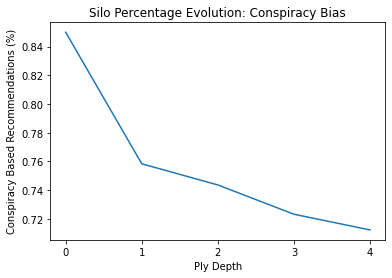

In [ ]:
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt

conspiracy_totals = defaultdict(list)
non_conspiracy_totals = defaultdict(list)
total_count = [0,0,0,0,0]
average = [0,0,0,0,0]

for i in range(1,41):
  file_name = 'bfs_'+ str(i) + '.csv'
  df = pd.read_csv(file_name)
  for j in range(5):
    conspiracy_totals[j].append(df['conspiracy'][j])
    
    non_conspiracy_totals[j].append(df['non_conspiracy'][j])

for k in range(0,5):
  total_count[k] = sum(conspiracy_totals[k]) + sum(non_conspiracy_totals[k])
  average[k] = (sum(conspiracy_totals[k])/total_count[k])

print(average)

x_axis = ['0','1','2','3', '4']
y_axis = average

plt.plot(x_axis, y_axis)
plt.title('Silo Percentage Evolution: Conspiracy Bias')
plt.xlabel('Ply Depth')
plt.ylabel('Conspiracy Based Recommendations (%)')
plt.show()